# Unsupervised learning - more algorithms
We will use another two clustering algorithms - DBSCAN and Hierarchical clustering. The base principles and important hyper-parameters will be explained.

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

## Lets take a look on our data files

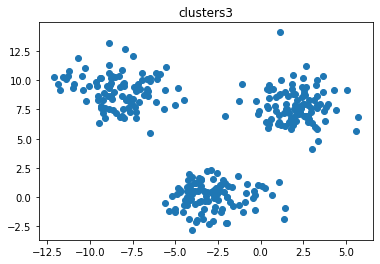

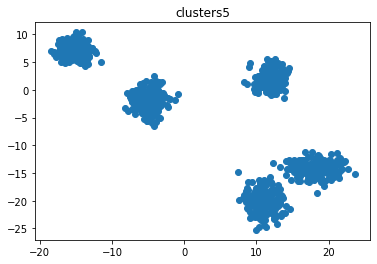

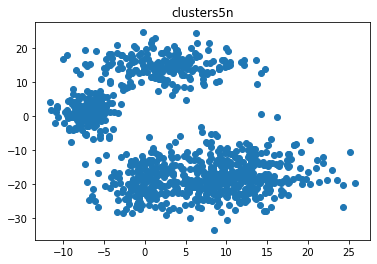

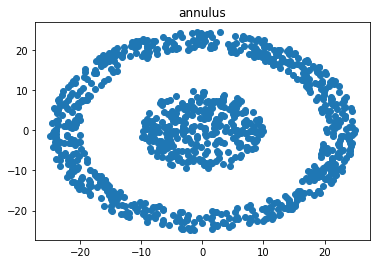

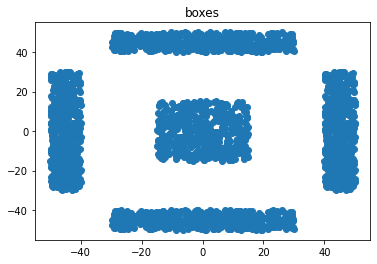

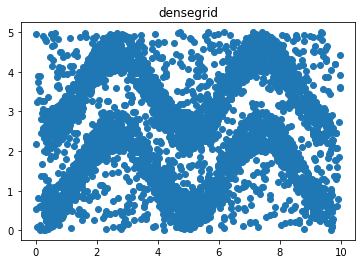

In [ ]:
datasets = dict()
for data_file in ['clusters3', 'clusters5', 'clusters5n', 'annulus', 'boxes', 'densegrid']:
    data = np.loadtxt(f'{data_file}.csv', delimiter=';')
    datasets[data_file] = data
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1])
    plt.title(data_file)

## Agglomerative clustering
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
- Take a look at https://stats.stackexchange.com/questions/195446/choosing-the-right-linkage-method-for-hierarchical-clustering

Agglomerative clustering is a bottom-up approach to clustering. We first divide each instance into its own cluster and merge them into couples based on a similarity metric.

Subsequently we compute the similarity again and merge the couples into bigger groups (clusters).

These groups are then merged into the bigger ones till there is only a one big group containing all the instances present at the top.

We don't have to know the number of clusters beforehand, we can perform the whole clustering process and select the appropriate number of clusters afterward based on the obtained results. We usually use the dendrogram for the distance threshold estimation.

You may ask how is the similarity among groups computed. There are various ways how we can compute the value.

### Linkage variants
- **Maximum or complete linkage**: The distance between two clusters is defined as the maximum value of all pairwise distances between the elements in cluster 1 and the elements in cluster 2. It tends to produce more compact clusters.


- **Minimum or single linkage**: The distance between two clusters is defined as the minimum value of all pairwise distances between the elements in cluster 1 and the elements in cluster 2. It tends to produce long, “loose” clusters.


- **Mean or average linkage**: The distance between two clusters is defined as the average distance between the elements in cluster 1 and the elements in cluster 2.

- **Ward’s minimum variance method**: It minimizes the total within-cluster variance. At each step the pair of clusters with minimum between-cluster distance are merged. A cloud more dense and more concentric towards its middle, whereas marginal points are few and could be scattered relatively freely emerges using this type of linkage.


#### We are going to take a look at dendrogram, but we will be using only smaller portion of data

In [ ]:
data = datasets['clusters3']
np.random.seed(42)
sel = np.random.choice(data.shape[0], size=30, replace=False)
data_subset = data[sel, :]
data_subset.shape

(30, 2)

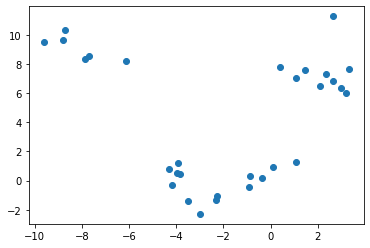

In [ ]:
plt.scatter(data_subset[:, 0], data_subset[:, 1])

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Credit to https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    plt.title('Hierarchical Clustering Dendrogram')
    dendrogram(linkage_matrix, **kwargs)
    plt.ylabel('distance')

### Complete linkage

#### We need to calculate whole hiearchical clustering tree before dendrogram calculation

- We can achieve this by setting distance_threshold=0, n_clusters=None in sklearn.cluster.AgglomerativeClustering

- Notice the height of the vertcal lines in the denrogram - the higher the line (called fusion), the lower is the similarity between the clusters, this similarity is called cophenetic distance.

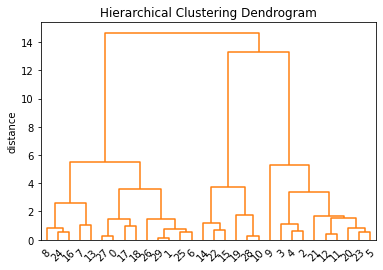

In [ ]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data_subset)

#plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=11)
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)

#### What can be ideal level for splitting our data to cluster?

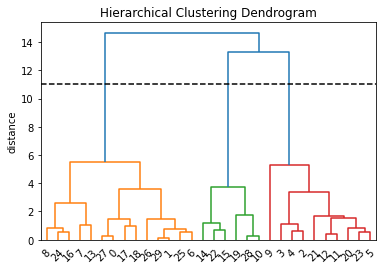

In [ ]:
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=11)
plt.axhline(y=11, color='black', linestyle='--')

## Generate dendrogram for the full dataset

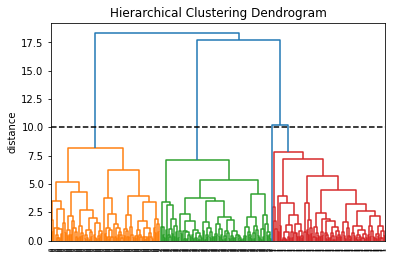

In [ ]:
clustering = AgglomerativeClustering(linkage='complete', compute_distances=True, distance_threshold=None, n_clusters=4)
clustering = clustering.fit(data)

plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=10)
plt.axhline(y=10, color='black', linestyle='--')

#### Lets generate clustering results and use sccater plot for visualizion for our 2D toy datasets

We can use one of following parameters to obtain our clusters from AgglomerativeClustering:
- **distance_thrashold** - this is effectively the split line above, i.e. if the distance between two clusters is higher than the *distance_thrashold*, then these clusters won't be merged
- **n_clusters** - similar to the k-means *k* parameter

In [ ]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=11, n_clusters=None)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

0    102
2    100
1     98
dtype: int64

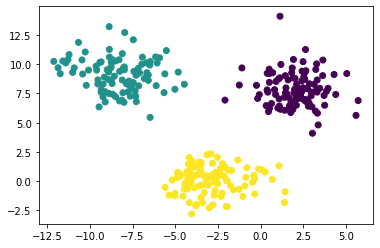

In [ ]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

## We can specify number of clusters directly

In [ ]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=None, n_clusters=3)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

0    102
2    100
1     98
dtype: int64

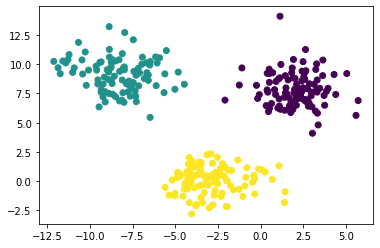

In [ ]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

### Single linkage

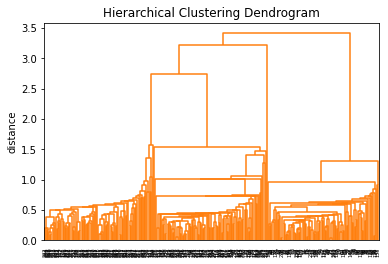

In [ ]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)
plt.show()

In [ ]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=2, n_clusters=None)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

1    101
3    100
0     98
2      1
dtype: int64

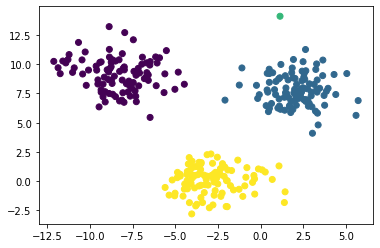

In [ ]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

## Use Agglomerative clustering for annulus data

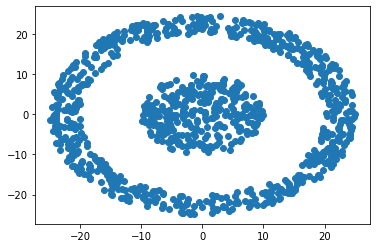

In [ ]:
data = datasets['annulus']
plt.scatter(data[:,0], data[:,1])

### Complete linkage

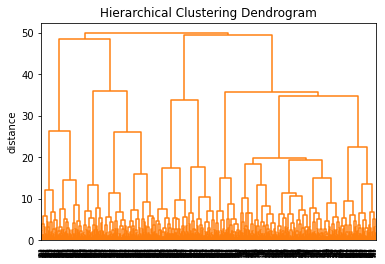

In [ ]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)
plt.show()

In [ ]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=None, n_clusters=4)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

1    477
0    219
2    179
3    125
dtype: int64

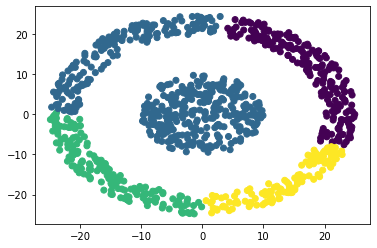

In [ ]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

### Single linkage

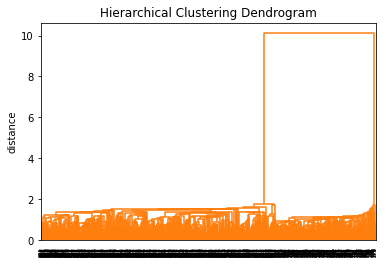

In [ ]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(data)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_, color_threshold=999)
plt.show()

In [ ]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=None, n_clusters=2)
clustering = clustering.fit(data)
pd.Series(clustering.labels_).value_counts()

0    700
1    300
dtype: int64

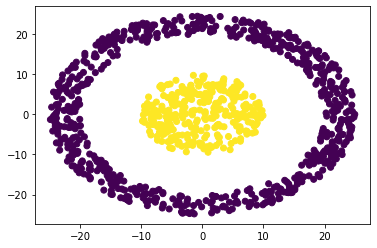

In [ ]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)

### Note: We have seen, that there is no clear winner among linkage parameters - it depends solely on the dataset (No Free Lunch Theorem)

#### For more clustering informations you can take a look into documentation https://scikit-learn.org/stable/modules/clustering.html#clustering

# Task (2p)
- Use **Agglomerative Clustering** on **clusters5** and **densegrid** datasets
- Detect "ideal" number of clusters using the dendrogram
- Explore detected clusters and **describe** them to the Markdown cell (use Box plots, compare median, std. dev, outliers, etc.)
- Use both, the single and complete linkage and compare the results of the clustering methods
    - How are the selected clusters aligned with the raw data (use scatter plots)?
    - i.e. You can guess the right number of clusters by taking a look at the data, is the result right from your point of view?

X                                                             \
           count       mean std        min        25%        50%        75%   
cluster_id                                                                    
0            1.0  11.882598 NaN  11.882598  11.882598  11.882598  11.882598   
1            1.0  11.768401 NaN  11.768401  11.768401  11.768401  11.768401   
2            1.0  14.524263 NaN  14.524263  14.524263  14.524263  14.524263   
3            1.0  11.850058 NaN  11.850058  11.850058  11.850058  11.850058   
4            1.0  11.163640 NaN  11.163640  11.163640  11.163640  11.163640   
...          ...        ...  ..        ...        ...        ...        ...   
995          1.0  -1.966217 NaN  -1.966217  -1.966217  -1.966217  -1.966217   
996          1.0  -5.818328 NaN  -5.818328  -5.818328  -5.818328  -5.818328   
997          1.0  -4.350847 NaN  -4.350847  -4.350847  -4.350847  -4.350847   
998          1.0  17.408053 NaN  17.408053  17.408053  17.408053  17.408053   
999          1.0 -14.786148 NaN -14.786148 -14.786148 -14.786148 -14.786148   

                          Y                                                  \
                  max count       mean std        min        25%        50%   
cluster_id                                                                    
0           11.882598   1.0   1.811861 NaN   1.811861   1.811861   1.811861   
1           11.768401   1.0   1.822019 NaN   1.822019   1.822019   1.822019   
2           14.524263   1.0   4.019364 NaN   4.019364   4.019364   4.019364   
3           11.850058   1.0   3.551793 NaN   3.551793   3.551793   3.551793   
4           11.163640   1.0   0.304948 NaN   0.304948   0.304948   0.304948   
...               ...   ...        ...  ..        ...        ...        ...   
995         -1.966217   1.0  -1.630385 NaN  -1.630385  -1.630385  -1.630385   
996         -5.818328   1.0  -4.105660 NaN  -4.105660  -4.105660  -4.105660   
997         -4.350847   1.0  -1.857905 NaN  -1.857905  -1.857905  -1.857905   
998         17.408053   1.0 -14.761459 NaN -14.761459 -14.761459 -14.761459   
999        -14.786148   1.0   6.695888 NaN   6.695888   6.695888   6.695888   

                                  
                  75%        max  
cluster_id                        
0            1.811861   1.811861  
1            1.822019   1.822019  
2            4.019364   4.019364  
3            3.551793   3.551793  
4            0.304948   0.304948  
...               ...        ...  
995         -1.630385  -1.630385  
996         -4.105660  -4.105660  
997         -1.857905  -1.857905  
998        -14.761459 -14.761459  
999          6.695888   6.695888  

[1000 rows x 16 columns]

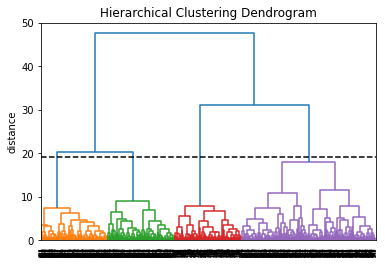

In [ ]:
#Complete
data_clusters5 = datasets['clusters5']
clustering_clusters5 = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering_clusters5 = clustering_clusters5.fit(data_clusters5)

plot_dendrogram(clustering_clusters5, labels=clustering_clusters5.labels_, color_threshold=19)
plt.axhline(y=19, color='black', linestyle='--')

#pd.Series(clustering_clusters5.labels_).value_counts()

data_to_panda = pd.DataFrame(data_clusters5, columns = ['X', 'Y'])
data_to_panda['cluster_id'] = clustering_clusters5.labels_
display(data_to_panda.groupby('cluster_id').describe())

X                                                             \
           count       mean std        min        25%        50%        75%   
cluster_id                                                                    
0            1.0  11.882598 NaN  11.882598  11.882598  11.882598  11.882598   
1            1.0  14.524263 NaN  14.524263  14.524263  14.524263  14.524263   
2            1.0   9.011492 NaN   9.011492   9.011492   9.011492   9.011492   
3            1.0  11.415564 NaN  11.415564  11.415564  11.415564  11.415564   
4            1.0   9.643029 NaN   9.643029   9.643029   9.643029   9.643029   
...          ...        ...  ..        ...        ...        ...        ...   
995          1.0  -5.806004 NaN  -5.806004  -5.806004  -5.806004  -5.806004   
996          1.0  -5.845661 NaN  -5.845661  -5.845661  -5.845661  -5.845661   
997          1.0  -4.934549 NaN  -4.934549  -4.934549  -4.934549  -4.934549   
998          1.0  17.408053 NaN  17.408053  17.408053  17.408053  17.408053   
999          1.0 -14.792850 NaN -14.792850 -14.792850 -14.792850 -14.792850   

                          Y                                                  \
                  max count       mean std        min        25%        50%   
cluster_id                                                                    
0           11.882598   1.0   1.811861 NaN   1.811861   1.811861   1.811861   
1           14.524263   1.0   4.019364 NaN   4.019364   4.019364   4.019364   
2            9.011492   1.0   4.039601 NaN   4.039601   4.039601   4.039601   
3           11.415564   1.0   1.504219 NaN   1.504219   1.504219   1.504219   
4            9.643029   1.0   1.043795 NaN   1.043795   1.043795   1.043795   
...               ...   ...        ...  ..        ...        ...        ...   
995         -5.806004   1.0  -4.094881 NaN  -4.094881  -4.094881  -4.094881   
996         -5.845661   1.0   0.278991 NaN   0.278991   0.278991   0.278991   
997         -4.934549   1.0  -0.487125 NaN  -0.487125  -0.487125  -0.487125   
998         17.408053   1.0 -14.761459 NaN -14.761459 -14.761459 -14.761459   
999        -14.792850   1.0   6.702643 NaN   6.702643   6.702643   6.702643   

                                  
                  75%        max  
cluster_id                        
0            1.811861   1.811861  
1            4.019364   4.019364  
2            4.039601   4.039601  
3            1.504219   1.504219  
4            1.043795   1.043795  
...               ...        ...  
995         -4.094881  -4.094881  
996          0.278991   0.278991  
997         -0.487125  -0.487125  
998        -14.761459 -14.761459  
999          6.702643   6.702643  

[1000 rows x 16 columns]

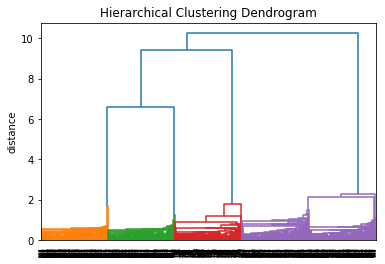

In [ ]:
#Single
clustering_clusters5_2 = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
clustering_clusters5_2 = clustering_clusters5_2.fit(data_clusters5)

plot_dendrogram(clustering_clusters5_2, labels=clustering_clusters5_2.labels_, color_threshold=6)

#pd.Series(clustering_clusters5_2.labels_).value_counts()
data_to_panda = pd.DataFrame(data_clusters5, columns = ['X', 'Y'])
data_to_panda['cluster_id'] = clustering_clusters5_2.labels_
display(data_to_panda.groupby('cluster_id').describe())

#Ideal number is 4


In [ ]:
#Complete
clustering_clusters5_n = AgglomerativeClustering(linkage='complete', distance_threshold=None, n_clusters=4)
clustering_clusters5_n = clustering_clusters5_n.fit(data_clusters5)

#pd.Series(clustering_clusters5.labels_).value_counts()

data_to_panda = pd.DataFrame(data_clusters5, columns = ['X', 'Y'])
data_to_panda['cluster_id'] = clustering_clusters5_n.labels_
display(data_to_panda.groupby('cluster_id').describe())

X                                                        \
            count       mean       std        min        25%        50%   
cluster_id                                                                
0           400.0  14.509703  3.965498   7.459144  10.835421  14.092142   
1           200.0  -5.004831  1.249279  -8.140405  -5.820985  -5.150009   
2           200.0  11.985017  1.127532   8.283492  11.302701  12.004088   
3           200.0 -15.013544  1.259524 -18.512336 -15.920977 -14.877221   

                                      Y                                  \
                  75%        max  count       mean       std        min   
cluster_id                                                                
0           18.232206  23.631331  400.0 -17.085897  3.373673 -25.271880   
1           -4.142536  -0.890631  200.0  -1.850925  1.656544  -6.507694   
2           12.819818  14.524263  200.0   1.997518  1.427104  -1.377888   
3          -14.108633 -11.488373  200.0   7.002057  1.204102   4.255644   

                                                        
                  25%        50%        75%        max  
cluster_id                                              
0          -20.047020 -16.499689 -14.030604 -11.238465  
1           -2.845599  -1.809073  -0.735397   2.539442  
2            0.968126   1.862717   2.975508   5.642099  
3            6.141138   6.892416   7.816122  10.400611

In [ ]:
#Single
clustering_clusters5_2_n = AgglomerativeClustering(linkage='single', distance_threshold=None, n_clusters=4)
clustering_clusters5_2_n = clustering_clusters5_2_n.fit(data_clusters5)

#pd.Series(clustering_clusters5_2.labels_).value_counts()
data_to_panda = pd.DataFrame(data_clusters5, columns = ['X', 'Y'])
data_to_panda['cluster_id'] = clustering_clusters5_2_n.labels_
display(data_to_panda.groupby('cluster_id').describe())

X                                                        \
            count       mean       std        min        25%        50%   
cluster_id                                                                
0           400.0  14.509703  3.965498   7.459144  10.835421  14.092142   
1           200.0 -15.013544  1.259524 -18.512336 -15.920977 -14.877221   
2           200.0  11.985017  1.127532   8.283492  11.302701  12.004088   
3           200.0  -5.004831  1.249279  -8.140405  -5.820985  -5.150009   

                                      Y                                  \
                  75%        max  count       mean       std        min   
cluster_id                                                                
0           18.232206  23.631331  400.0 -17.085897  3.373673 -25.271880   
1          -14.108633 -11.488373  200.0   7.002057  1.204102   4.255644   
2           12.819818  14.524263  200.0   1.997518  1.427104  -1.377888   
3           -4.142536  -0.890631  200.0  -1.850925  1.656544  -6.507694   

                                                        
                  25%        50%        75%        max  
cluster_id                                              
0          -20.047020 -16.499689 -14.030604 -11.238465  
1            6.141138   6.892416   7.816122  10.400611  
2            0.968126   1.862717   2.975508   5.642099  
3           -2.845599  -1.809073  -0.735397   2.539442

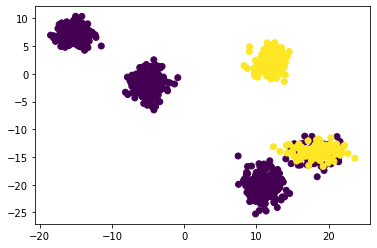

In [ ]:
plt.scatter(data_clusters5[:,0], data_clusters5[:,1], c=clustering.labels_)

#The result is right from my point of view

X                                                   Y         \
           count   mean std    min    25%    50%    75%    max count   mean   
cluster_id                                                                    
0            1.0  6.691 NaN  6.691  6.691  6.691  6.691  6.691   1.0  1.851   
1            1.0  2.697 NaN  2.697  2.697  2.697  2.697  2.697   1.0  2.292   
2            1.0  9.589 NaN  9.589  9.589  9.589  9.589  9.589   1.0  0.850   
3            1.0  9.163 NaN  9.163  9.163  9.163  9.163  9.163   1.0  1.235   
4            1.0  7.825 NaN  7.825  7.825  7.825  7.825  7.825   1.0  2.619   
...          ...    ...  ..    ...    ...    ...    ...    ...   ...    ...   
3995         1.0  3.679 NaN  3.679  3.679  3.679  3.679  3.679   1.0  3.749   
3996         1.0  4.892 NaN  4.892  4.892  4.892  4.892  4.892   1.0  2.831   
3997         1.0  5.209 NaN  5.209  5.209  5.209  5.209  5.209   1.0  3.338   
3998         1.0  0.958 NaN  0.958  0.958  0.958  0.958  0.958   1.0  2.673   
3999         1.0  7.461 NaN  7.461  7.461  7.461  7.461  7.461   1.0  3.764   

                                                   
           std    min    25%    50%    75%    max  
cluster_id                                         
0          NaN  1.851  1.851  1.851  1.851  1.851  
1          NaN  2.292  2.292  2.292  2.292  2.292  
2          NaN  0.850  0.850  0.850  0.850  0.850  
3          NaN  1.235  1.235  1.235  1.235  1.235  
4          NaN  2.619  2.619  2.619  2.619  2.619  
...         ..    ...    ...    ...    ...    ...  
3995       NaN  3.749  3.749  3.749  3.749  3.749  
3996       NaN  2.831  2.831  2.831  2.831  2.831  
3997       NaN  3.338  3.338  3.338  3.338  3.338  
3998       NaN  2.673  2.673  2.673  2.673  2.673  
3999       NaN  3.764  3.764  3.764  3.764  3.764  

[4000 rows x 16 columns]

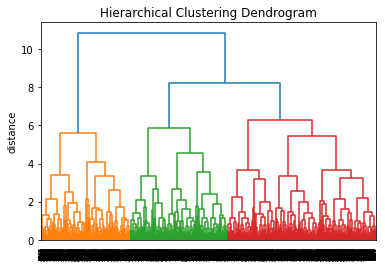

In [ ]:
#Complete
data_densegrid = datasets['densegrid']
clustering_densegrid = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering_densegrid = clustering_densegrid.fit(data_densegrid)

plot_dendrogram(clustering_densegrid, labels=clustering_densegrid.labels_, color_threshold=7)
#pd.Series(clustering_densegrid.labels_).value_counts()
data_to_panda = pd.DataFrame(data_densegrid, columns = ['X', 'Y'])
data_to_panda['cluster_id'] = clustering_densegrid.labels_
display(data_to_panda.groupby('cluster_id').describe())


X                                                   Y         \
           count   mean std    min    25%    50%    75%    max count   mean   
cluster_id                                                                    
0            1.0  6.691 NaN  6.691  6.691  6.691  6.691  6.691   1.0  1.851   
1            1.0  2.697 NaN  2.697  2.697  2.697  2.697  2.697   1.0  2.292   
2            1.0  1.596 NaN  1.596  1.596  1.596  1.596  1.596   1.0  1.531   
3            1.0  7.825 NaN  7.825  7.825  7.825  7.825  7.825   1.0  2.619   
4            1.0  9.163 NaN  9.163  9.163  9.163  9.163  9.163   1.0  1.235   
...          ...    ...  ..    ...    ...    ...    ...    ...   ...    ...   
3995         1.0  1.055 NaN  1.055  1.055  1.055  1.055  1.055   1.0  3.579   
3996         1.0  4.892 NaN  4.892  4.892  4.892  4.892  4.892   1.0  2.831   
3997         1.0  7.127 NaN  7.127  7.127  7.127  7.127  7.127   1.0  2.527   
3998         1.0  1.000 NaN  1.000  1.000  1.000  1.000  1.000   1.0  2.555   
3999         1.0  0.729 NaN  0.729  0.729  0.729  0.729  0.729   1.0  4.814   

                                                   
           std    min    25%    50%    75%    max  
cluster_id                                         
0          NaN  1.851  1.851  1.851  1.851  1.851  
1          NaN  2.292  2.292  2.292  2.292  2.292  
2          NaN  1.531  1.531  1.531  1.531  1.531  
3          NaN  2.619  2.619  2.619  2.619  2.619  
4          NaN  1.235  1.235  1.235  1.235  1.235  
...         ..    ...    ...    ...    ...    ...  
3995       NaN  3.579  3.579  3.579  3.579  3.579  
3996       NaN  2.831  2.831  2.831  2.831  2.831  
3997       NaN  2.527  2.527  2.527  2.527  2.527  
3998       NaN  2.555  2.555  2.555  2.555  2.555  
3999       NaN  4.814  4.814  4.814  4.814  4.814  

[4000 rows x 16 columns]

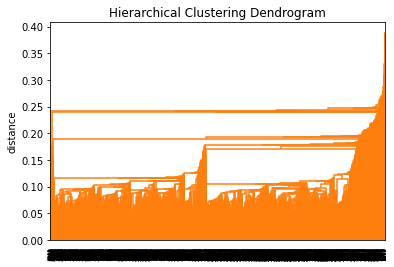

In [ ]:
#Single
clustering_densegrid_2 = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
clustering_densegrid_2 = clustering_densegrid_2.fit(data_densegrid)

plot_dendrogram(clustering_densegrid_2, labels=clustering_densegrid_2.labels_, color_threshold=12)
#pd.Series(clustering_densegrid_2.labels_).value_counts()
data_to_panda = pd.DataFrame(data_densegrid, columns = ['X', 'Y'])
data_to_panda['cluster_id'] = clustering_densegrid_2.labels_
display(data_to_panda.groupby('cluster_id').describe())

#The ideal number is 3

In [ ]:
#Complete
clustering_densegrid_n = AgglomerativeClustering(linkage='complete', distance_threshold=None, n_clusters=3)
clustering_densegrid_n = clustering_densegrid_n.fit(data_densegrid)

#pd.Series(clustering_densegrid.labels_).value_counts()
data_to_panda = pd.DataFrame(data_densegrid, columns = ['X', 'Y'])
data_to_panda['cluster_id'] = clustering_densegrid_n.labels_
display(data_to_panda.groupby('cluster_id').describe())

X                                                         \
             count      mean       std    min    25%    50%    75%    max   
cluster_id                                                                  
0           1766.0  5.007177  1.313694  2.069  4.038  5.035  6.030  7.786   
1           1073.0  8.397167  0.804317  6.652  7.794  8.378  9.072  9.970   
2           1161.0  1.673270  0.964196  0.005  0.850  1.568  2.363  3.750   

                 Y                                                          
             count      mean       std    min    25%     50%    75%    max  
cluster_id                                                                  
0           1766.0  2.519734  1.324738  0.010  1.335  2.6015  3.582  4.993  
1           1073.0  2.742255  1.391501  0.016  1.591  2.7900  4.054  4.996  
2           1161.0  2.251104  1.161100  0.010  1.374  2.2480  2.994  4.980

In [ ]:
#Single
clustering_densegrid_2_n = AgglomerativeClustering(linkage='single', distance_threshold=None, n_clusters=3)
clustering_densegrid_2_n = clustering_densegrid_2_n.fit(data_densegrid)

#pd.Series(clustering_densegrid_2.labels_).value_counts()
data_to_panda = pd.DataFrame(data_densegrid, columns = ['X', 'Y'])
data_to_panda['cluster_id'] = clustering_densegrid_2_n.labels_
display(data_to_panda.groupby('cluster_id').describe())

X                                                         \
             count    mean       std    min      25%    50%    75%    max   
cluster_id                                                                  
0           3998.0  4.9504  2.740555  0.005  2.63225  4.934  7.336  9.970   
1              1.0  1.1540       NaN  1.154  1.15400  1.154  1.154  1.154   
2              1.0  2.6470       NaN  2.647  2.64700  2.647  2.647  2.647   

                 Y                                                         
             count      mean      std    min    25%    50%     75%    max  
cluster_id                                                                 
0           3998.0  2.501794  1.31059  0.010  1.404  2.488  3.5915  4.996  
1              1.0  0.061000      NaN  0.061  0.061  0.061  0.0610  0.061  
2              1.0  3.590000      NaN  3.590  3.590  3.590  3.5900  3.590

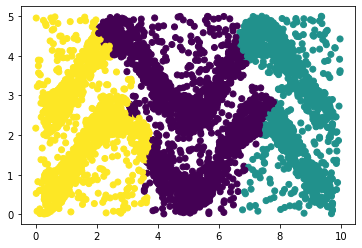

In [ ]:
plt.scatter(data_densegrid[:,0], data_densegrid[:,1], c=clustering_densegrid_n.labels_)